Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg"> Clean version](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/demos/demo06/demo06.ipynb)

[<img src="https://colab.research.google.com/assets/colab-badge.svg"> Modified in class](https://colab.research.google.com/drive/1L1NnD_7iw4DPpZYt2pvlY8QQc2E-SjqJ?usp=sharing)

# Demo 6 - Accessing (and Wrangling) Data from the Web

- APIs
- Parsing JSON
- Messy data
- Big data 

In [108]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory
# You will need to change this to your own folder on Google Drive
os.chdir('/content/drive/MyDrive/Teaching/URSP688Y Spring 2024/demos/week06')

# Import demo module
import demo06

## Where are we?
### A steep learning curve

You have been exposed to <ins>a lot</ins> of new coding skills <ins>very</ins> quickly. There has been so much to learn just to get off the ground.

- Programming fundamentals
    - Variables
    - Data types
        - ints, floats, strings
        - lists, dictionaries
    - Conditions
    - Loops
    - Functions
    - Packages and modules
- Tabular analysis
    - Pandas DataFrames
    - Long and wide tables
    - Columnwise calculations
    - Filtering
    - Grouping and aggregation
    - Joining
- Visualization
    - Principles of graphic communication
    - Plotting in Python
        - Matplotlib
        - Seaborn 

Now we're at an inflection point, where we slow down on learning new things, and start using our toolset in different ways to expand our capabilities.

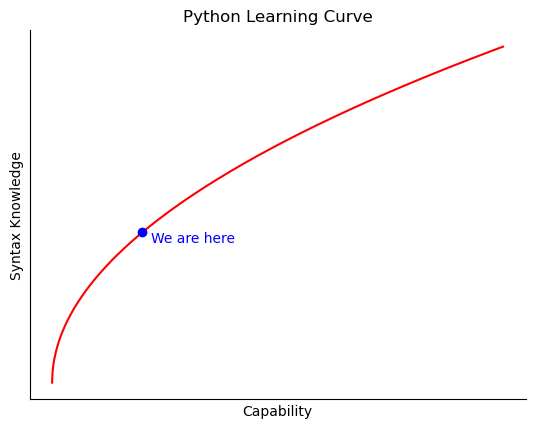

In [141]:
demo06.plot_syntax_for_capability(steepness=2, here=2)
# demo06.plot_capability_for_syntax(steepness=2, here=2)

## Today: Retrieving and analyzing data from the internet
- Packages
- Basic data types: lists and dictionaries
- Tabular analysis

### Live demo: how can we code our way to a solution?
Rather than a precooked example, let's work on solving a problem in real time, with all its messiness. This will demonstrate how to:
- work through programming logic (pseudocode)
- operationalize the logic in code, piece by piece
- Google for things you don't know how to do
- put all the pieces together into a streamlined process, then into a function
- tidy everything up for sharing

### Let's work together to answer these questions:
1. How many trips were made by Capital Bikeshare in the past 24 hours?
2. How many bikes are being used right now?

### We'll use data from an API:
[Capital Bikeshare System Data](https://capitalbikeshare.com/system-data)

In [143]:
# Some initial pseudocode to get us started:

# 1. How many trips were made by Capital Bikeshare in the past 24 hours?
# Count trips in the past 24 hours
## Identify trips in the data -- how will we do this?
## Filter to the past 24 hours

# 2. How many bikes are being used right now?
# Calculate how many bikes there are in total
# Calculate how many bikes are available right now
# Subtract available bikes from total bikes to find bikes in use

# Setup

In [ ]:
# Import packages
import json
import requests
import pandas as pd

# Request current data from the API

In [4]:
# Making a get request
response = requests.get('https://gbfs.lyft.com/gbfs/1.1/dca-cabi/en/free_bike_status.json')

# Get JSON content
data = response.json()

# Inspect the contents
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [5]:
# Make a dataframe out of data for available bikes
df = pd.DataFrame(data['data']['bikes'])

df.head()

type  fusion_lat        lon                           bike_id  \
0  electric_bike         0.0 -76.940127  fc02aae4aca57dbd6414368e3cea29e1   
1  electric_bike         0.0 -77.049662  00677c29d7827cdbc8d9ce020e430952   
2  electric_bike         0.0 -77.045894  32fb0c045ba029b131e89846fbb47ddc   
3  electric_bike         0.0 -77.147678  2d698429b86315064e6211d75ade27b9   
4  electric_bike         0.0 -77.002738  c704f9f6475b1d3decaac6f2566a7822   

   is_disabled  is_reserved  \
0            0            0   
1            0            0   
2            0            0   
3            0            0   
4            0            0   

                                         rental_uris  fusion_lon     name  \
0  {'android': 'https://dc.lft.to/lastmile_qr_sca...         0.0  570-760   
1  {'android': 'https://dc.lft.to/lastmile_qr_sca...         0.0  268-224   
2  {'android': 'https://dc.lft.to/lastmile_qr_sca...         0.0  329-768   
3  {'android': 'https://dc.lft.to/lastmile_qr_sca...         0.0  201-455   
4  {'android': 'https://dc.lft.to/lastmile_qr_sca...         0.0  361-062   

         lat  
0  38.955433  
1  38.896053  
2  38.902572  
3  38.863933  
4  38.960355

# Load JSON data saved in a file

In [6]:
# open a single stored json
with open('cabi_data/cabi_bike_status_2024-03-03_13-11-54.json') as json_data: # Notice how I added 'cabi_data/' to the front of the path to get into that subdirectory where the jsons are stored?
    data = json.load(json_data)
    json_data.close()

In [8]:
# see how the data are stored
type(data)

dict

In [10]:
# see what keys are available
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [11]:
# drill into the records for each bike
records = data['data']['bikes']

# convert to a dataframe
df = pd.DataFrame(records)

# drop a column that we won't use, just to keep things clean
df = df.drop(columns=['rental_uris'])

In [12]:
df.head()

is_reserved  fusion_lon  fusion_lat        lat           type  is_disabled  \
0            0         0.0         0.0  38.887458  electric_bike            0   
1            0         0.0         0.0  38.905328  electric_bike            0   
2            0         0.0         0.0  38.908954  electric_bike            0   
3            0         0.0         0.0  38.955421  electric_bike            0   
4            0         0.0         0.0  38.892292  electric_bike            0   

                            bike_id     name        lon  
0  d94788433d337e4186fb431076b52e91  320-065 -77.025747  
1  cc49246f85fdc23a6a13b3402ab52b37  222-581 -77.058526  
2  75c5df17a8236707a7948f509a5ab929  228-812 -77.043055  
3  4e51a79c1e03962064762ff16013b1a8  570-760 -76.940135  
4  5983a1b66f086f7905d8aa701fa7b5df  268-224 -77.042912

# Iteratively load all the JSON files and combine them into a single dataframe

Except for the impact statements above, this is probably the only part of the code you'll need to keep. This function wraps all the loading steps. Feel free to delete the cells above if you're not using them.

In [40]:
df = exercise06.load_and_combine_free_bike_status_jsons_as_df('cabi_data')

df.head()

is_reserved  fusion_lon  fusion_lat        lat           type  is_disabled  \
0            0         0.0         0.0  38.887454  electric_bike            0   
1            0         0.0         0.0  38.955455  electric_bike            0   
2            0         0.0         0.0  38.881496  electric_bike            0   
3            0         0.0         0.0  38.907839  electric_bike            0   
4            0         0.0         0.0  38.898333  electric_bike            0   

                            bike_id     name        lon  \
0  004adeb2565b0b8af16a6f3d2b8ad722  320-065 -77.025700   
1  6cd9e2fb1a21dbfef272e9c124fe24cf  570-760 -76.940044   
2  bab1bca067cc7519c1a62a62b01ba295  268-224 -77.027400   
3  1f719ba71dea69a3374262a0774e1499  137-726 -77.071575   
4  01ad43dc4c3bf21915eb6eaf244e6fce  329-768 -77.046828   

                  timestamp  
0 2024-03-04 00:27:20-05:00  
1 2024-03-04 00:27:20-05:00  
2 2024-03-04 00:27:20-05:00  
3 2024-03-04 00:27:20-05:00  
4 2024-03-04 00:27:20-05:00

This is where you take over. Can you use this dataframe to answer the question(s) above?